In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_directory = "data/train"

In [3]:
train_data_generator = ImageDataGenerator(rescale=1/255)

In [4]:
train_generator = train_data_generator.flow_from_directory(train_directory,target_size=(64,64), class_mode="binary", batch_size=32)

Found 10532 images belonging to 2 classes.


In [5]:
val_directory = "data/val"

In [6]:
val_data_generator = ImageDataGenerator(rescale=1/255)

In [7]:
val_generator = val_data_generator.flow_from_directory(val_directory,target_size=(64,64), class_mode="binary", batch_size=32)

Found 1316 images belonging to 2 classes.


In [8]:
from keras import layers, Input
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2,2)))

In [19]:
model.add(layers.Flatten())

In [20]:
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    31,490,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,492,865 (120.14 MB)

 Trainable params: 31,492,865 (120.14 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
history = model.fit(train_generator, validation_data=val_generator, epochs=30)
print("işlem tamam")

Epoch 1/30


/home/hta/anaconda3/envs/ai/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


330/330 ━━━━━━━━━━━━━━━━━━━━ 135s 405ms/step - accuracy: 0.7632 - loss: 0.7964 - val_accuracy: 0.8723 - val_loss: 0.2999
Epoch 2/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 130s 393ms/step - accuracy: 0.8996 - loss: 0.2578 - val_accuracy: 0.8746 - val_loss: 0.3029
Epoch 3/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 137s 413ms/step - accuracy: 0.9101 - loss: 0.2348 - val_accuracy: 0.8997 - val_loss: 0.2586
Epoch 4/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 126s 383ms/step - accuracy: 0.9175 - loss: 0.2042 - val_accuracy: 0.9035 - val_loss: 0.2671
Epoch 5/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 104s 316ms/step - accuracy: 0.9239 - loss: 0.1931 - val_accuracy: 0.8853 - val_loss: 0.2864
Epoch 6/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 92s 278ms/step - accuracy: 0.9290 - loss: 0.1809 - val_accuracy: 0.8929 - val_loss: 0.2731
Epoch 7/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 94s 284ms/step - accuracy: 0.9414 - loss: 0.1510 - val_accuracy: 0.8959 - val_loss: 0.2996
Epoch 8/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 91s 276ms/step - accuracy: 0.9432 - loss: 0.1442 

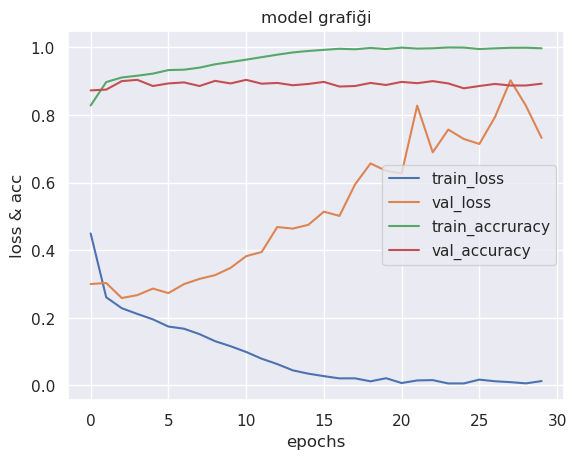

In [27]:
import seaborn as sns
sns.set(style="darkgrid")
epochs=30
plt.plot(np.arange(0,epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), history.history["accuracy"], label="train_accruracy")
plt.plot(np.arange(0,epochs), history.history["val_accuracy"], label="val_accuracy")
plt.title("model grafiği")
plt.xlabel("epochs")
plt.ylabel("loss & acc")
plt.legend()
plt.show()

In [29]:
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,shear_range=0.2,zoom_range=0.2, horizontal_flip=True,
                                 vertical_flip=True, fill_mode = "nearest")

In [30]:
validation_datagen = ImageDataGenerator(rescale=1/255)

In [31]:
train_generator = train_datagen.flow_from_directory(train_directory,target_size=(64,64), batch_size=32, class_mode="binary")

Found 10532 images belonging to 2 classes.


In [33]:
validation_generator = validation_datagen.flow_from_directory(val_directory,target_size=(64,64), batch_size=32, class_mode="binary")

Found 1316 images belonging to 2 classes.


In [34]:
model=Sequential()


model.add(Input(shape=(64,64,3)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(96,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 96)     │        27,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 762,593 (2.91 MB)

 Trainable params: 762,593 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [37]:
history = model.fit(train_generator,validation_data=val_generator,epochs=30)
print("işlem tamam")

Epoch 1/30


/home/hta/anaconda3/envs/ai/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


330/330 ━━━━━━━━━━━━━━━━━━━━ 29s 82ms/step - accuracy: 0.7192 - loss: 0.6075 - val_accuracy: 0.7196 - val_loss: 0.5952
Epoch 2/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.7216 - loss: 0.5889 - val_accuracy: 0.7196 - val_loss: 0.5891
Epoch 3/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 30s 89ms/step - accuracy: 0.7086 - loss: 0.5985 - val_accuracy: 0.7196 - val_loss: 0.5817
Epoch 4/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.7217 - loss: 0.5811 - val_accuracy: 0.7196 - val_loss: 0.5820
Epoch 5/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step - accuracy: 0.7208 - loss: 0.5807 - val_accuracy: 0.7196 - val_loss: 0.5640
Epoch 6/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.7184 - loss: 0.5779 - val_accuracy: 0.7196 - val_loss: 0.5357
Epoch 7/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 86ms/step - accuracy: 0.7192 - loss: 0.5683 - val_accuracy: 0.7196 - val_loss: 0.5578
Epoch 8/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.7230 - loss: 0.5660 - val_accurac

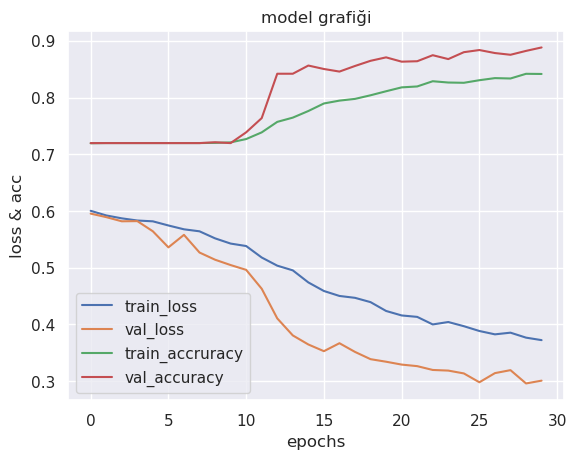

In [38]:
import seaborn as sns
sns.set(style="darkgrid")
epochs=30
plt.plot(np.arange(0,epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), history.history["accuracy"], label="train_accruracy")
plt.plot(np.arange(0,epochs), history.history["val_accuracy"], label="val_accuracy")
plt.title("model grafiği")
plt.xlabel("epochs")
plt.ylabel("loss & acc")
plt.legend()
plt.show()

In [40]:
model.save("btk.keras")

In [4]:
import os
total=0
error=0
from tensorflow.keras.preprocessing import image
test_directory = 'data/test'

for category in os.listdir(test_directory):

    category_directory = os.path.join(test_directory, category)

    for image_name in os.listdir(category_directory):

        img_path = os.path.join(category_directory, image_name)
        img = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.
        prediction = model.predict(img_array)

        # if path has positive and image is negative or path has negative and image is positive

        if (category == 'positives' and prediction[0] <= 0.5) or (category == 'negatives' and prediction[0] > 0.5):
            error += 1
        
        total += 1

print('Total:', total)
print('Error:', error)
print('Accuracy:', 1 - error / total)

NameError: name 'model' is not defined